In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mesh
import geometry
import material
from stress_strain_analysis import stress_strain_analysis

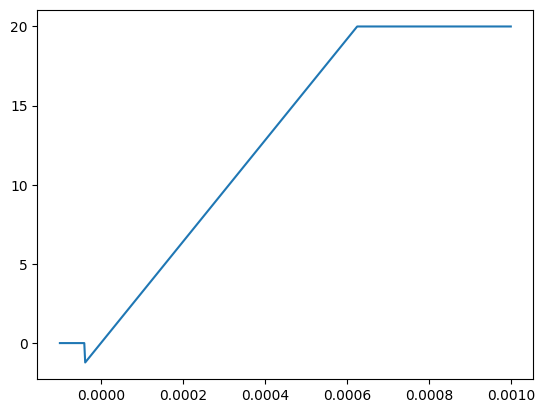

In [15]:
concrete = material.Concrete_C30_37()

strains = np.linspace(-0.0001, 0.001, 500)
stresses = [concrete.get_stress(strain) for strain in strains]

plt.plot(strains, stresses)
plt.show()

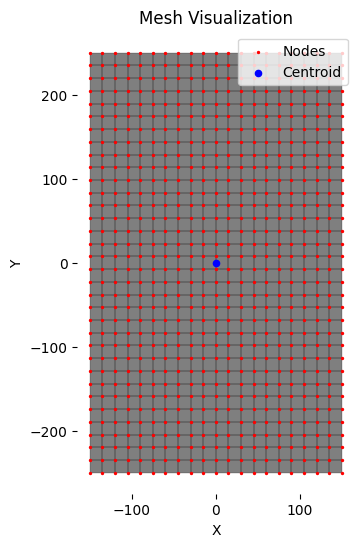

╒════════════════════╤═══════════════╕
│ Mesh Type          │ quadrilateral │
├────────────────────┼───────────────┤
│ Number of elements │ 660           │
├────────────────────┼───────────────┤
│ Number of nodes    │ 714           │
├────────────────────┼───────────────┤
│ Cross Section Area │ 150000.00     │
╘════════════════════╧═══════════════╛
╒═══════════════════╤═══════════════╤═══════════════╕
│                   │             X │             Y │
╞═══════════════════╪═══════════════╪═══════════════╡
│ Centroid          │         -0.00 │         -0.00 │
├───────────────────┼───────────────┼───────────────┤
│ Moment of inertia │ 3125000000.00 │ 1125000000.00 │
╘═══════════════════╧═══════════════╧═══════════════╛


In [3]:
H    = geometry.Rectangle(width     = 300.0,
                          height    = 500.0)
Mesh = mesh.Mesh(H, "quadrilateral", 15)

Mesh.plot()
Mesh.print()

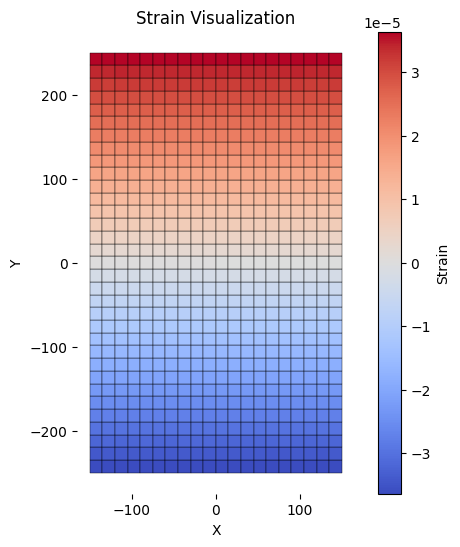

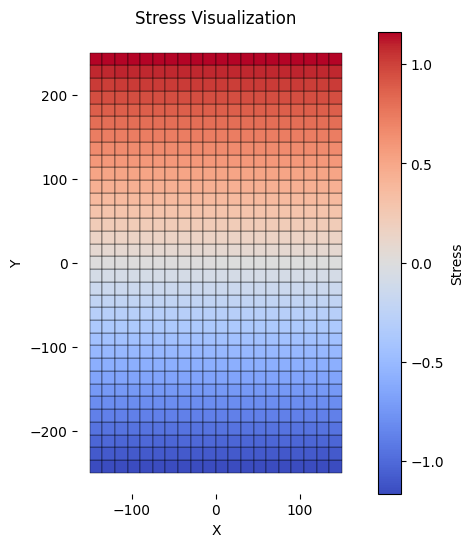

In [9]:
Analysis = stress_strain_analysis(Mesh)

Analysis.set_strain_and_curvature(0.00, 0.00000015)

Analysis.calculate_strains()
Analysis.plot_strains()

Analysis.calculate_stresses()
Analysis.plot_stresses()

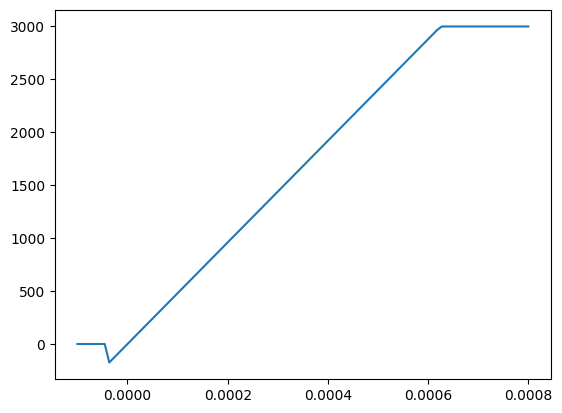

In [5]:
strains = np.linspace(-0.0001, 0.0008, 100)

Nx = []

for strain in strains:
    Analysis.set_strain_and_curvature(strain, 0)
    Analysis.calculate_strains()
    Analysis.calculate_stresses()
    Nx.append(Analysis.get_section_forces()[0])

plt.plot(strains, Nx)
plt.show()

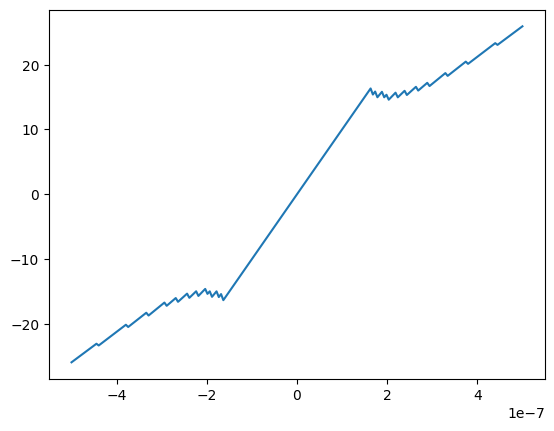

In [8]:
curvs = np.linspace(-0.0000005, 0.0000005, 200)

My = []

for curv in curvs:
    Analysis.set_strain_and_curvature(0, curv)
    Analysis.calculate_strains()
    Analysis.calculate_stresses()
    My.append(Analysis.get_section_forces()[1])

plt.plot(curvs, My)
plt.show()

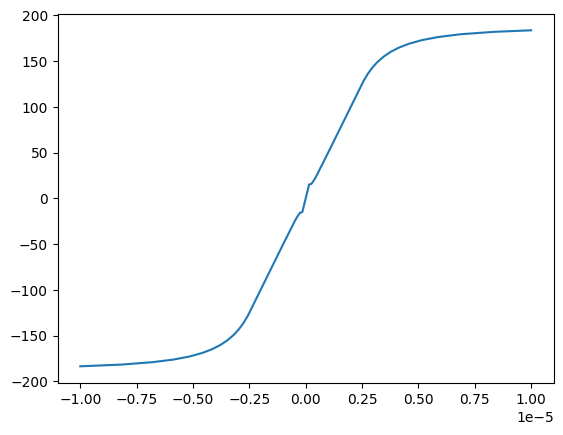

In [12]:
curvs = np.linspace(-0.00001, 0.00001, 200)

My = []

for curv in curvs:
    Analysis.set_strain_and_curvature(0, curv)
    Analysis.calculate_strains()
    Analysis.calculate_stresses()
    My.append(Analysis.get_section_forces()[1])

plt.plot(curvs, My)
plt.show()

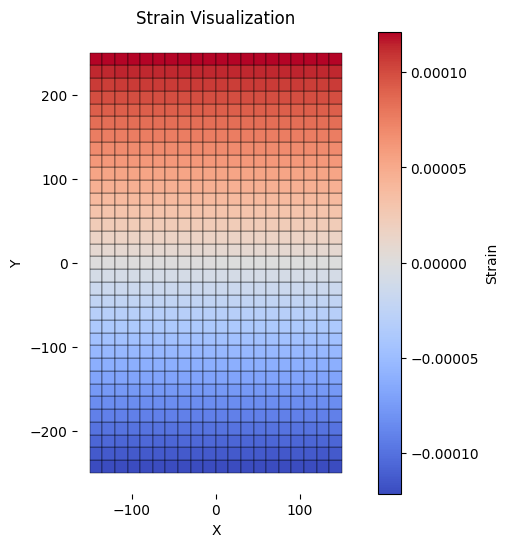

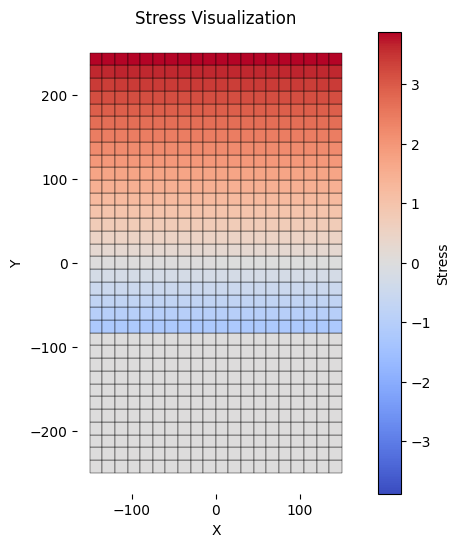

Nx =  133.33333333332823 kN
My =  25.895316804408186 kNm


In [13]:
Analysis.set_strain_and_curvature(0.000, 0.0000005)
Analysis.calculate_strains()
Analysis.calculate_stresses()
Analysis.plot_strains()
Analysis.plot_stresses()
print("Nx = ", Analysis.get_section_forces()[0], "kN")
print("My = ", Analysis.get_section_forces()[1], "kNm")

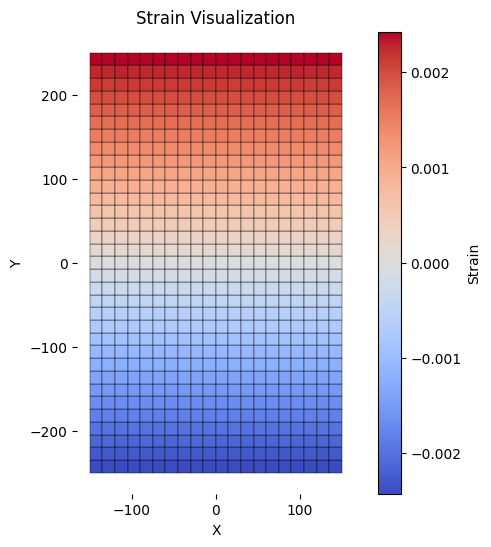

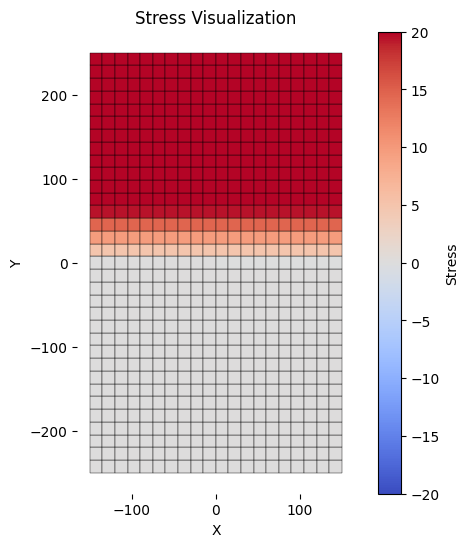

Nx =  1311.2947658402156 kN
My =  183.57124968695277 kNm


In [14]:
Analysis.set_strain_and_curvature(0.000, 0.00001)
Analysis.calculate_strains()
Analysis.calculate_stresses()
Analysis.plot_strains()
Analysis.plot_stresses()
print("Nx = ", Analysis.get_section_forces()[0], "kN")
print("My = ", Analysis.get_section_forces()[1], "kNm")